In [112]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls
# import warnings
# warnings.filterwarnings('ignore')

In [113]:
#sadi imports
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [114]:
admission_df = pd.read_csv("data/ADMISSIONS_full.csv")

In [115]:
admission_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
5,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,V-TACH,0,1
6,27,27,134931,2191-11-30 22:16:00,2191-12-03 14:45:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
7,28,28,162569,2177-09-01 07:15:00,2177-09-06 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
8,29,30,104557,2172-10-14 14:17:00,2172-10-19 14:37:00,NaN,URGENT,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,NaN,NaN,UNSTABLE ANGINA\CATH,0,1
9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,STATUS EPILEPTICUS,1,1


In [116]:
infections = ["UROSEPSIS", "HYPONATREMIA;URINARY TRACT INFECTION", "UTI/PYELONEPHRITIS", "SEPSIS;TELEMETRY", "SEPSIS", "FEVER;URINARY TRACT INFECTION", "URINARY TRACT INFECTION;PYELONEPHRITIS"]

In [117]:
admission_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
5,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,V-TACH,0,1
6,27,27,134931,2191-11-30 22:16:00,2191-12-03 14:45:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
7,28,28,162569,2177-09-01 07:15:00,2177-09-06 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
8,29,30,104557,2172-10-14 14:17:00,2172-10-19 14:37:00,NaN,URGENT,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,NaN,NaN,UNSTABLE ANGINA\CATH,0,1
9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,STATUS EPILEPTICUS,1,1


In [118]:
admission_df['INFECTION_STATUS'] = 0;

In [119]:
for infection in infections:
    admission_df.loc[admission_df['DIAGNOSIS'] == infection, "INFECTION_STATUS"] = 1

In [120]:
admission_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,INFECTION_STATUS
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,0
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,0
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,0
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,0
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,0
5,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,V-TACH,0,1,0
6,27,27,134931,2191-11-30 22:16:00,2191-12-03 14:45:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1,0
7,28,28,162569,2177-09-01 07:15:00,2177-09-06 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,0
8,29,30,104557,2172-10-14 14:17:00,2172-10-19 14:37:00,NaN,URGENT,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,NaN,NaN,UNSTABLE ANGINA\CATH,0,1,0
9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,STATUS EPILEPTICUS,1,1,0


In [121]:
len(admission_df['DIAGNOSIS'].unique())

15692

In [124]:
drop_elements = ['HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'LANGUAGE', 'MARITAL_STATUS', 'EDREGTIME', 'EDOUTTIME', 'HAS_CHARTEVENTS_DATA']
data_id = admission_df.drop(drop_elements, axis = 1).dropna()
data = data_id.drop(['ROW_ID', 'SUBJECT_ID'],axis=1) 

In [123]:
data

,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,INFECTION_STATUS
0,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,UNOBTAINABLE,WHITE,BENZODIAZEPINE OVERDOSE,0,0
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,0
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,BRAIN MASS,0,0
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,PROTESTANT QUAKER,WHITE,INTERIOR MYOCARDIAL INFARCTION,0,0
4,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,UNOBTAINABLE,WHITE,ACUTE CORONARY SYNDROME,0,0
5,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,CATHOLIC,UNKNOWN/NOT SPECIFIED,V-TACH,0,0
6,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,CATHOLIC,WHITE,NEWBORN,0,0
7,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,0
8,URGENT,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,CATHOLIC,UNKNOWN/NOT SPECIFIED,UNSTABLE ANGINA\CATH,0,0
9,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,CATHOLIC,WHITE,STATUS EPILEPTICUS,1,0


In [76]:
y = data['INFECTION_STATUS']
X = data.drop(['INFECTION_STATUS'], axis=1)


from collections import defaultdict
d = defaultdict(LabelEncoder)
X = X.apply(lambda x: d[x.name].fit_transform(x))

In [17]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.4)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# rf.score(X_test, y_test)
y_pred = rf.predict(X_test)

Normalized confusion matrix
[[  9.99e-01   8.78e-04]
 [  7.70e-02   9.23e-01]]


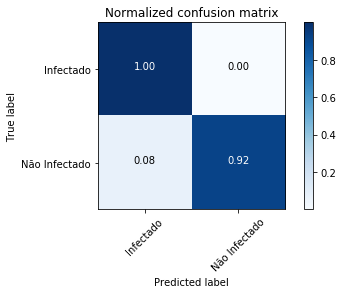

In [18]:
class_names = ['Infectado', 'Não Infectado']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Microbiology events

In [25]:
microb = pd.read_csv('./data/MICROBIOLOGYEVENTS_full.csv')

241          21
2208        195
2414        171
3331        283
3720        330
4761        419
5285        395
5557        497
5938        423
7211        585
7427        546
8134        652
9754        786
9787        627
10257       711
10261       711
10781       711
10957       878
12749      1386
13244      1038
14220      1006
14240      1006
14418      1000
14531      1295
14861      1357
15546      1079
16439      1113
16645      1729
17571      1602
17709      1337
          ...  
616553    87526
616930    88081
617216    85688
617518    85976
617532    85976
617603    86371
618282    84457
618788    84838
619587    87687
620245    86879
620458    84465
621386    84854
622675    85441
623130    83182
623293    87687
623671    87963
624156    87186
624772    99231
624930    98342
625191    99411
625945    98744
626035    99333
627513    99366
627546    99562
628743    99231
629217    98310
630269    98584
630321    98593
630716    99783
631293    98853
Name: SUBJECT_ID, Length

In [32]:
c_diff_ids = microb[microb['ORG_NAME'] == 'CLOSTRIDIUM DIFFICILE']['SUBJECT_ID'].drop_duplicates().values

array([   21,   195,   171, ..., 98593, 99783, 98853])

In [44]:
c_diff_ids

array([   21,   195,   171, ..., 98593, 99783, 98853])

In [37]:
X = data.drop('INFECTION_STATUS', axis=1)
X

,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG
0,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,UNOBTAINABLE,WHITE,BENZODIAZEPINE OVERDOSE,0
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,BRAIN MASS,0
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,PROTESTANT QUAKER,WHITE,INTERIOR MYOCARDIAL INFARCTION,0
4,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,UNOBTAINABLE,WHITE,ACUTE CORONARY SYNDROME,0
5,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,CATHOLIC,UNKNOWN/NOT SPECIFIED,V-TACH,0
6,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,CATHOLIC,WHITE,NEWBORN,0
7,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0
8,URGENT,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,CATHOLIC,UNKNOWN/NOT SPECIFIED,UNSTABLE ANGINA\CATH,0
9,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,CATHOLIC,WHITE,STATUS EPILEPTICUS,1


In [108]:
microbio_df = pd.read_csv('./data/MICROBIOLOGYEVENTS_full.csv')
cdiff_df = microbio_df.loc[microbio_df['ORG_NAME'] == 'CLOSTRIDIUM DIFFICILE']
d = pd.DataFrame()
for i in range(0, cdiff_df.shape[0]):
    a = admission_df['SUBJECT_ID'] == cdiff_df["SUBJECT_ID"].values[i]
    b = admission_df['ADMITTIME'] + ("48:00:00") <= cdiff_df["CHARTTIME"].values[i]
    c = cdiff_df["CHARTTIME"].values[i] <= admission_df['DISCHTIME'] 
    d = d.append(admission_df[a&b&c])

In [111]:
row_ids_cdiff = d['ROW_ID'] 

In [125]:
y = [1 if (tup.ROW_ID in row_ids_cdiff) else 0 for tup in data_id.itertuples()]

Normalized confusion matrix
[[ 0.79  0.21]
 [ 0.79  0.21]]


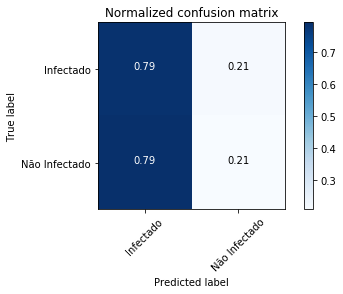

In [161]:
# X = X.drop(['DISCHARGE_LOCATION','HOSPITAL_EXPIRE_FLAG'], axis=1)
# X = X.drop(['HOSPITAL_EXPIRE_FLAG'], axis=1)
X_train, X_test, y_train, y_test  = train_test_split(X_res, y_res, test_size=0.3)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#TODO imbalanced learning

BAM, deu pau aí em cima

1003

In [127]:
X

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,RELIGION,ETHNICITY,DIAGNOSIS
0,1,2,3,19,36,2264
1,0,4,2,3,36,4741
2,1,5,2,3,36,2535
3,1,5,3,16,36,7762
4,1,2,3,19,36,457
5,1,5,2,3,35,15360
6,2,4,3,3,36,10087
7,0,4,2,3,36,4741
8,3,5,2,3,35,15144
9,1,5,2,3,36,14007


In [153]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=31, ratio={0:2000, 1:1000})
from imblearn.under_sampling import RandomUnderSampler 
X_res, y_res = rus.fit_sample(X, y)

In [132]:
score

0.97833148132319003

In [129]:
rf.feature_importances_

array([ 0.02,  0.03,  0.04,  0.08,  0.08,  0.75])

In [86]:
i = np.argmax(rf.feature_importances_)
X.columns[i]

'DIAGNOSIS'

In [130]:
X

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,RELIGION,ETHNICITY,DIAGNOSIS
0,1,2,3,19,36,2264
1,0,4,2,3,36,4741
2,1,5,2,3,36,2535
3,1,5,3,16,36,7762
4,1,2,3,19,36,457
5,1,5,2,3,35,15360
6,2,4,3,3,36,10087
7,0,4,2,3,36,4741
8,3,5,2,3,35,15144
9,1,5,2,3,36,14007
